# Logistic Regression
Agenda today:
- Introducing the intuition of logistic regression 
- Odds and log odds
- Interpretation of logistic regression coefficients
- Building a logistic regression model in scikitlearn
- Using Maximum Likelihood Estimate to fit logistic regression curve

After today, you will be able to...
- Understand the difference between odds, probability, log odds
- Interpret the coefficients of logistic regression 
- Apply logistic regression to your own data
- Understand how MLE is applied to optimize for parameters 

## Part I. Intuition of Logistic Regression  -- The Big Picture
When you are interested in predicting a categorical outcome using linear model, you might run into trouble--the continous output simple linear regression gives you just does not make sense. Luckily, the logistic regression allows you to make binary prediction by taking the outcome through a transformation, such that the binary outcome can be represented as a probability of belonging to one class. This transformation, called the Sigmoid function, lies in the heart of logistic regression.

Linear regression formula:
$$Y = B_0 + B_1X_1$$

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
data = pd.read_csv('diabetes.csv')
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


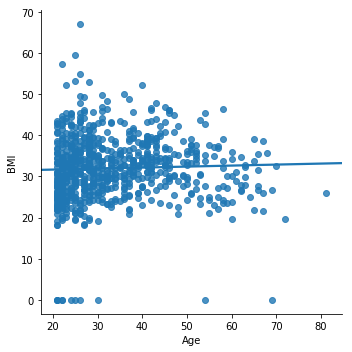

In [16]:
sns.lmplot(x='Age', y='BMI', data=data, ci=None)


However, we can no longer use linear regression to predict a categorical outcome such as whether someone has diabetes ("Outcome")

Text(0, 0.5, 'Outcome')

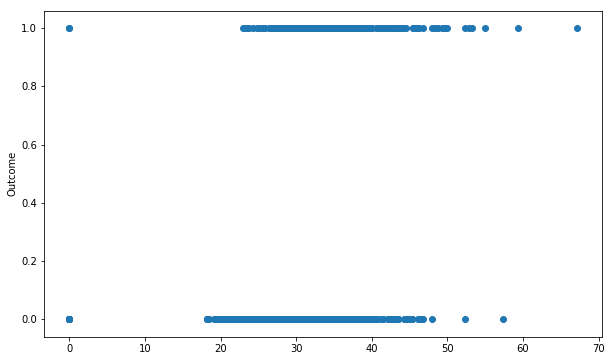

In [17]:
plt.figure(figsize = (10,6))
plt.scatter(data.BMI, data.Outcome)
plt.xlabel('')
plt.ylabel('Outcome')

Text(-1.5750000000000028, 0.5, 'Outcome')

<Figure size 720x432 with 0 Axes>

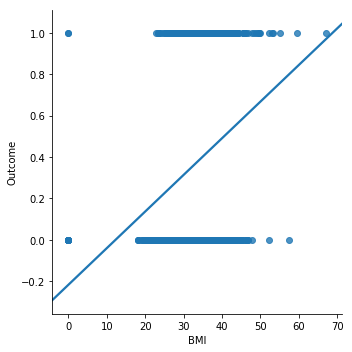

In [18]:
plt.figure(figsize = (10,6))
sns.lmplot(x='BMI',y='Outcome',data=data, ci=None)
plt.xlabel('BMI')
plt.ylabel('Outcome')

Unfortunately, we can no longer just use a linear function to interpolate a value. We want to predict probability that represents the binary outcome of 1 and 0, what should we do?

<img src="https://media.giphy.com/media/8lQyyys3SGBoUUxrUp/giphy.gif" >

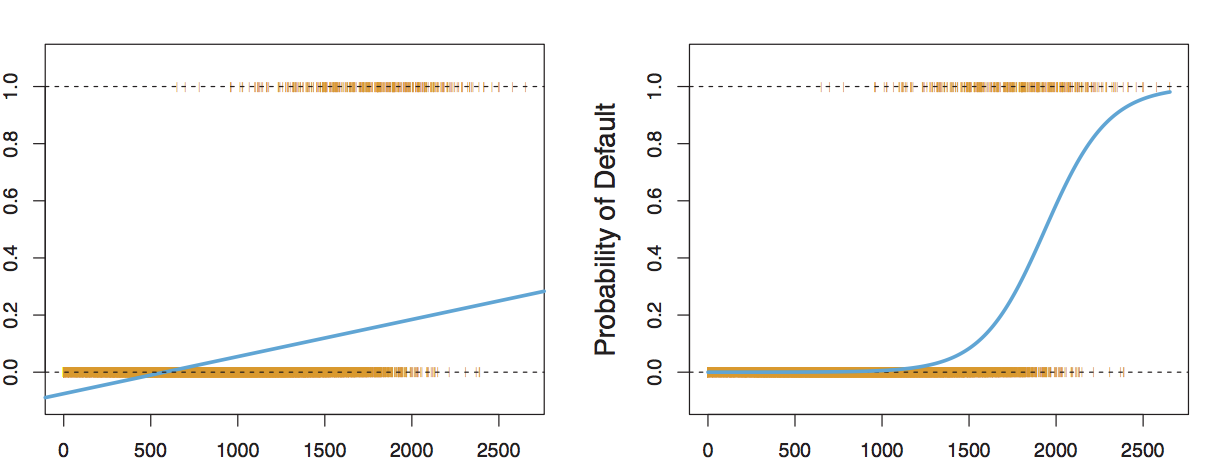

Graph credit: Introduction to statistical learning in r

Because our outcome variable is binary, we need to confine it to a probability from 0 to 1 for any given values of the predictor(s). Therefore, we need to apply a function that transforms the old linear regression's to achieve this goal. Enters the Sigmoid Function. 

Let $P(y=1|X) = p(X)$,

$$p(X) = \frac{e^{B_0+B_1 X_1}}{1+e^{B_0+B_1 X_1}}$$

Doing a bit of manipulation, we get:

$$\frac{p(X)}{1-p(X)} = e^{B_0+B_1 X_1}$$

Taking the log of both side, we get:

$$log(\frac{p(X)}{1-p(X)}) = B_0+B_1 X_1$$

## 2. Odds, log odds, and the logit function


#### ODDS

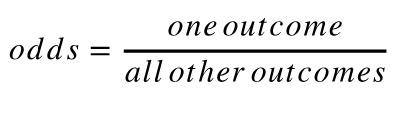

For example, for an event with probability of 0.75, the odds of the event is
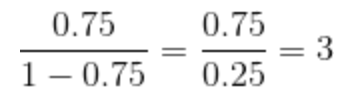

#### LOG 
$$ 2^4 = 16$$ $$\log_2(16) = 4$$

The values of odds range from 0 to infinity. When the value is less than 1, the odds are in favor of event not occuring; however, when odds is greater than, they are in favor of the events occuring. This poses a problem--the asymmetry. Therefore, we use the log of the odds to fix the asymmetry. <br>
Log(0.75/(1-0.75)) = 1.09 <br>
Log(0.25/(1-0.25)) = -1.09

#### Probability, Odds, and Log odds

In [19]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


In [20]:
# add log-odds to the table
# the log is a monotonic function 
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


## Part III. Logistic Regression Model Construction & Coefficients

In [21]:
# interpreting the logistic regression's coefficients with continuous features 
# build a logistic regression
y = data.Outcome

In [22]:
y.shape

(768,)

In [23]:
X = pd.DataFrame(np.zeros(768))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [25]:
# fit the model 
logreg = LogisticRegression().fit(X_train,y_train)

/Users/flee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
# predict on the testing dataset
logreg.predict(X_test.iloc[1:2,:])
# use the model to predict whether subject 0,1 in the testing set would have diabetes

array([0])

In [27]:
print(logreg.coef_)
print(logreg.intercept_)

[[0.]]
[-0.6281568]


Logistic Regression formula:
$$Y = -0.6281568$$

In [28]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [29]:
print("Null model of probability of being obese is" + " "+ str(268/(268+500)))
print("The odds of being obese is" + " " + str(0.34895833/(1-0.34895833)))
print("the logged odds of being obese is" + " " + str(np.log(0.536)))

Null model of probability of being obese is 0.3489583333333333
The odds of being obese is 0.53599999213568
the logged odds of being obese is -0.623621117911335


Sklearn automatically use the threshold of 0.5

In [30]:
# look at how accurate our model has performed. This
X = data[['BMI', 'Age']]
y = data.Outcome
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
logreg = LogisticRegression().fit(X_train,y_train)
logreg.score(X, y, sample_weight=None)

/Users/flee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6770833333333334

In [31]:
# we can also use the predict_proba function to examine the predicted probability for the given classes
# logreg.predict_proba(X_test.iloc[1:2,:])
# logreg.predict_log_proba(X_test.iloc[1:2,:])

#### Logistic Regression Coefficients and Interpretation

In [32]:
# examine the coefficients
logreg.coef_

array([[0.07707392, 0.0455765 ]])

In [33]:
# examine the intercepts
logreg.intercept_

array([-4.64711424])

The Logistic Regression can be written as : <br>
$$Y = -4.64 + 0.077X1 + 0.045X2$$


#### Your turn: get the probability of being diabetic given BMI = 45, and age = 25?

In [34]:
# compute predicted log-odds for BMI=45 and age=25 using the equation
#logdds = logreg.intercept_
BMI_45_age_25_logodds = None
BMI_45_age_25_logodds

In [35]:
# compute the odds from the log odds by exponentiating it
# convert log-odds to odds
BMI_45_age_25_odds = None
BMI_45_age_25_odds

In [36]:
# compute the probability from the odds
BMI_45_age_25_prob = None
BMI_45_age_25_prob

#### How to interpret the predictors?


In [39]:
X = data[['BMI']]
y = data.Outcome
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
logreg = LogisticRegression().fit(X_train,y_train)
logreg.score(X, y, sample_weight=None)

/Users/flee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6692708333333334

In [40]:
logreg.coef_

array([[0.07978784]])

In [41]:
logreg.intercept_

array([-3.21017629])

Logreg equation:
$$Y = -3.21 + 0.077X_1$$

In [42]:
## when X, BMI = 40 
y_hat_40 = logreg.intercept_[0] + logreg.coef_[0][0] * 40
y_hat_41 = logreg.intercept_[0] + logreg.coef_[0][0] * 41

y_hat_41 - y_hat_40

0.07978784282410523

How do you interpret the value above?

Can we translate the logodds increase associated with increase in BMI into increase in odds, sure can!
Recall that logarithm converts multiplication and division to addition and subtraction. Its inverse, the exponentiation converts addition and subtraction back to multiplication and division.  If we exponentiate both sides of our last equation, we have the following:

In [44]:
np.exp(y_hat_41) / np.exp(y_hat_40)

1.0830572649280101

exp\[log(p/(1-p)(BMI=41) - log(p/(1-p)(BMI=40)] = 
exp(log(p/(1-p))(math=41)) / exp(log(p/(1-p))(BMI = 40)) = 
odds(BMI=41)/odds(BMI=40) = 1.08.


__Bottom line__: Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

What happens if you have a categorical predictor in your data? Can you still use logistic or other regressions?
The answer is yes. When you have a categorical variable, it can be run as a predictor in the logistic regression as long as you turn it into a dummy variable.

## Part IV. Logistic Regression Likelihood Function & Maximum Likelihood Estimation

In order to estimate the value of the coefficients for logistic regression, we use a general statistical procedure called the Maximum Likelihood Estimate. **MLE is used to determine the parameter values of a model such that we are maximizing the likelihood of process described the model actually produce the data that we observe.**

But what does that mean? Given some obeservations, we want to find the parameter value that best describe the distribution of the observations.

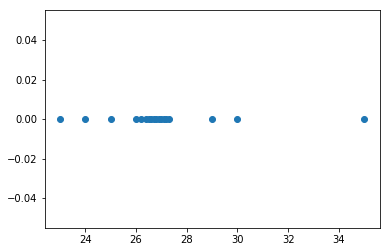

In [84]:
# for example, if we have data:
import scipy
import numpy as npg
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pylab as pl
val = 0. # this is the value where you want the data to appear on the y-axis.
weight_of_puppies = [23,24,25,26,26.2,26.4,26.5,26.6,26.7,26.8,26.9,27,27.1,27.2,27.3,29,30,35]
#plt.figure(figsize = (8,8))
puppies = plt.plot(weight_of_puppies, np.zeros_like(weight_of_puppies) + val, 'o')
plt.show()

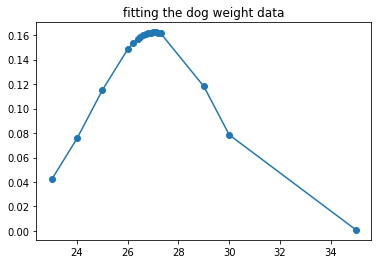

In [58]:
weight_of_puppies = sorted(weight_of_puppies)  #sorted
fit = stats.norm.pdf(weight_of_puppies, np.mean(weight_of_puppies), np.std(weight_of_puppies))  #this is a fitting indeed

pl.plot(weight_of_puppies,fit,'-o')

#pl.hist(h,normed=True)      #use this to draw histogram of your data
pl.title('fitting the dog weight data')
pl.show()   


To apply the MLE to our data, we first need to choose the proper cost function, or the correct distribution, that fit our data. How to choose the proper distribution is beyond the scope of this class and won't be discussed here. Suppose we have picked the correct cost function, what we are doing is choosing the **best** parameter values such that we are maximizing the log of the likelihood function below:


__Likelihood Function__:
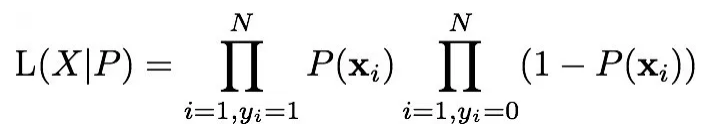
__Intuition__:
We find the optimal value of parameters B0 and B1 such that the predicted value (Yhat) is as close to the ground truth (Y) as possible therefore, it is is expressed as the product of the predicted likelihood of the N individual observations. <br>

Even though it is possible to use a form of least square, maximum likelihood is preferred in this case -- the algorithm finds the line that fits the data such that it maximizes the above likelihood function. As we mentioned yesterday, it is usually easier to work with log-likelihood, since maximizing the log-likelihood maximizes the originial likelihood function as well (monotonicity of the log)

Hence, we want to maximize the log-likelihood of the following function: <br>
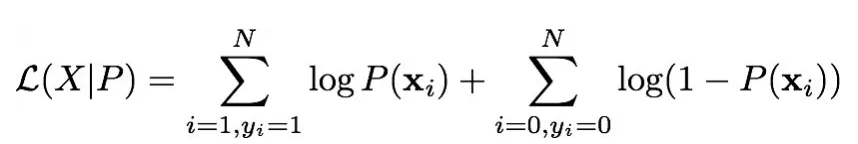


__Resources__:<br>
- Introduction to Statistical Learning in R: https://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf <br>
- Logistic Regression Intuition: https://www.youtube.com/watch?v=yIYKR4sgzI8 <br>
- Logistic Regression Coefficients: https://www.youtube.com/watch?v=vN5cNN2-HWE <br>
- Logistic Regression optimizing using MLE intuition: https://www.youtube.com/watch?v=BfKanl1aSG0 <br>
- Interpreting coefficients of logistic regression: https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/
- A readable derivation of logistic regression cost function: http://www.win-vector.com/blog/2011/09/the-simpler-derivation-of-logistic-regression/
- Andrew Ng's Chapter two of Deep Learning/Neural Network has a great explanation on Logistic Regression, its cost function and gradient descent: https://www.coursera.org/learn/neural-networks-deep-learning/home/week/2
- compute standard error: https://stats.stackexchange.com/questions/89484/how-to-compute-the-standard-errors-of-a-logistic-regressions-coefficients/89520